In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import clustering as cl
import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


## Load Pickel file from archetype_analysis.ipynb

In [2]:
df_teams_aa = pd.read_pickle("./pickle_files/df_teams_only_aa.pkl")

## Load match related data

In [3]:
df_matches_20_21 = pd.read_csv("ms/auto_download/auto_download_files/germany-bundesliga-matches-2020-to-2021-stats.csv")
df_matches_19_20 = pd.read_csv("ms/germany_stats/match_stats/germany-bundesliga-matches-2019-to-2020-stats.csv")
df_matches_18_19 = pd.read_csv("ms/germany_stats/match_stats/germany-bundesliga-matches-2018-to-2019-stats.csv")
df_matches_17_18 = pd.read_csv("ms/germany_stats/match_stats/germany-bundesliga-matches-2017-to-2018-stats.csv")
df_matches_16_17 = pd.read_csv("ms/germany_stats/match_stats/germany-bundesliga-matches-2016-to-2017-stats.csv")

In [4]:
df_all = pd.concat([
                    df_matches_20_21,
                    df_matches_19_20, 
                    df_matches_18_19, 
                    df_matches_17_18, 
                    df_matches_16_17],sort=False)
df_all = df_all[df_all['status'] != 'suspended']

In [5]:
df_all.sort_values('timestamp', inplace=True)
df_all.reset_index(inplace=True)
df_all.drop('index', axis=1, inplace=True)

In [6]:
df_all[df_all['status']=='complete'].tail()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,...,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
1228,1600522200,Sep 19 2020 - 1:30pm,complete,NaN,Werder Bremen,Hertha BSC,Sascha Stegemann,0.0,0.0,0.0,...,2.60,3.40,2.85,1.24,1.77,2.95,5.55,1.61,2.15,wohninvest WESERSTADION (Bremen)
1229,1600522200,Sep 19 2020 - 1:30pm,complete,NaN,Stuttgart,Freiburg,Benjamin Cortus,0.0,0.0,0.0,...,2.20,3.80,3.25,1.18,1.61,2.55,4.45,1.53,2.30,Mercedes-Benz-Arena (Stuttgart)
1230,1600533000,Sep 19 2020 - 4:30pm,complete,NaN,Borussia Dortmund,Borussia M'gladbach,Felix Brych,0.0,0.0,3.0,...,1.69,4.05,5.10,1.19,1.62,2.55,4.55,1.59,2.15,Signal-Iduna-Park (Dortmund)
1231,1600608600,Sep 20 2020 - 1:30pm,complete,NaN,RB Leipzig,Mainz 05,Manuel Gräfe,0.0,0.0,3.0,...,1.37,5.75,8.00,1.10,1.36,1.95,3.10,1.57,2.20,Red Bull Arena (Leipzig)
1232,1600617600,Sep 20 2020 - 4:00pm,complete,NaN,Wolfsburg,Bayer Leverkusen,Sven Jablonski,0.0,0.0,1.0,...,3.20,3.65,2.25,1.20,1.65,2.65,4.75,1.54,2.30,VOLKSWAGEN ARENA (Wolfsburg)


In [7]:
df_all.to_excel('test.xlsx')
df_all.to_pickle('pickle_files/df_all.pkl')

In [8]:
df_all['attendance'][df_all['attendance'] < 0] = 0

In [9]:
from pandas.plotting import scatter_matrix

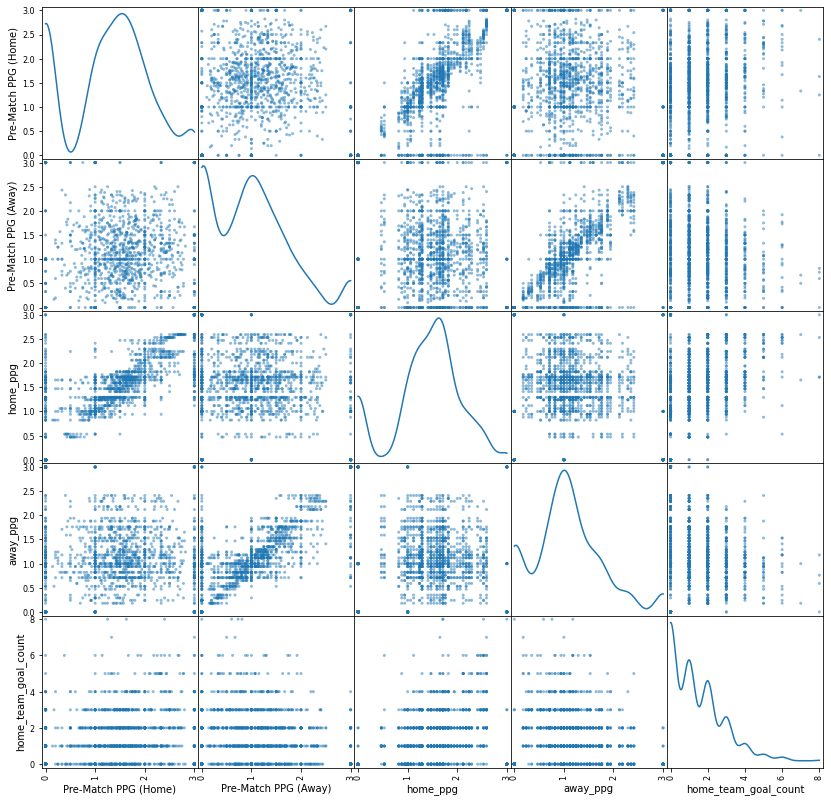

In [10]:
scatter_matrix(df_all[df_all.iloc[:,6:12].columns], diagonal='kde', figsize=(14,14));

## Append results from AA Analysis as features for home and away Team to match-related-dataset

In [11]:
# import datetime
# start_bool = False

# if start_bool==True:

#     target_time = datetime.datetime.now() + datetime.timedelta(days=7)
#     target_time = target_time.replace(microsecond=0)
#     delta = target_time - datetime.datetime.now()

#     time=delta.days

In [12]:
# + 9 per match day
int_for_test = 1242
int_for_prediction = int_for_test - 9

In [13]:
columns=pd.Series(df_teams_aa.iloc[:,:-1].columns)
columns_h = list(columns.apply(lambda x: "ht_" + x))
columns_a = list(columns.apply(lambda x: "awt_" + x))

In [14]:
df_empty_columns = pd.DataFrame(columns=(columns_h + columns_a))
df_matches_with_aa = pd.concat([df_all,df_empty_columns], axis=1)

In [15]:
df_matches_with_aa_complete = df_matches_with_aa.copy()
df_matches_with_aa_complete = df_matches_with_aa_complete.iloc[:int_for_test,:]

In [16]:
#df_matches_with_aa_complete.to_excel('test.xlsx')

In [17]:
pre_cols = [col for col in df_matches_with_aa_complete.columns if 'pre' in col]
PRE_cols = [col for col in df_matches_with_aa_complete.columns if 'Pre' in col]
aa_cols_home = [col for col in df_matches_with_aa_complete.columns if 'ht_' in col]
aa_cols_away = [col for col in df_matches_with_aa_complete.columns if 'awt_' in col]

In [18]:
df_matches_with_aa_complete.tail()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,...,ht_0,ht_1,ht_2,ht_3,ht_4,awt_0,awt_1,awt_2,awt_3,awt_4
1237,1601127000,Sep 26 2020 - 1:30pm,incomplete,NaN,Augsburg,Borussia Dortmund,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1238,1601127000,Sep 26 2020 - 1:30pm,incomplete,NaN,Arminia Bielefeld,Köln,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1239,1601137800,Sep 26 2020 - 4:30pm,incomplete,NaN,Schalke 04,Werder Bremen,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1240,1601213400,Sep 27 2020 - 1:30pm,incomplete,NaN,Hoffenheim,Bayern München,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1241,1601222400,Sep 27 2020 - 4:00pm,incomplete,NaN,Freiburg,Wolfsburg,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_matches_with_aa_complete

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,...,ht_0,ht_1,ht_2,ht_3,ht_4,awt_0,awt_1,awt_2,awt_3,awt_4
0,1472236200,Aug 26 2016 - 6:30pm,complete,75000.0,Bayern München,Werder Bremen,NaN,0.0,0.0,2.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1472304600,Aug 27 2016 - 1:30pm,complete,81360.0,Borussia Dortmund,Mainz 05,NaN,0.0,0.0,2.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1472304600,Aug 27 2016 - 1:30pm,complete,50107.0,Hamburger SV,Ingolstadt,NaN,0.0,0.0,1.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1472304600,Aug 27 2016 - 1:30pm,complete,50000.0,Köln,Darmstadt 98,NaN,0.0,0.0,1.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1472304600,Aug 27 2016 - 1:30pm,complete,47000.0,Eintracht Frankfurt,Schalke 04,NaN,0.0,0.0,1.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,1601127000,Sep 26 2020 - 1:30pm,incomplete,NaN,Augsburg,Borussia Dortmund,NaN,0.0,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1238,1601127000,Sep 26 2020 - 1:30pm,incomplete,NaN,Arminia Bielefeld,Köln,NaN,0.0,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1239,1601137800,Sep 26 2020 - 4:30pm,incomplete,NaN,Schalke 04,Werder Bremen,NaN,0.0,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1240,1601213400,Sep 27 2020 - 1:30pm,incomplete,NaN,Hoffenheim,Bayern München,NaN,0.0,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
for index, row in df_matches_with_aa_complete.iterrows():
    teams_aa_score_home = list(df_teams_aa[df_teams_aa['common_name']==row['home_team_name']].iloc[:,:-1].iloc[0])
    teams_aa_score_away = list(df_teams_aa[df_teams_aa['common_name']==row['away_team_name']].iloc[:,:-1].iloc[0])

    df_matches_with_aa_complete.at[index, aa_cols_home] = teams_aa_score_home
    df_matches_with_aa_complete.at[index, aa_cols_away] = teams_aa_score_away 

In [21]:
df_matches_with_aa_complete['HTGDIFF'] = df_matches_with_aa_complete['home_team_goal_count'] - df_matches_with_aa_complete['away_team_goal_count']
df_matches_with_aa_complete['ATGDIFF'] = df_matches_with_aa_complete['away_team_goal_count'] - df_matches_with_aa_complete['home_team_goal_count']

## Calculate AVG goal difference for home and away team rolling 10 Games

In [22]:
def avg_goal_diff(df, avg_h_a_diff, a_h_team, a_h_goal_letter):
    """
    input: 
        df = dataframe with all results
        avg_h_a_diff = name of the new column
        a_h_team = HomeTeam or AwayTeam
        a_h_goal_letter = 'H' for home or 'A' for away
    output: 
        avg_per_team = dictionary with with team as key and columns as values with new column H/ATGDIFF
    """
    df[avg_h_a_diff] = 0
    avg_per_team = {}
    all_teams = df[a_h_team].unique()
    for t in all_teams:
        df_team = df[df[a_h_team]==t].fillna(0)
        result = df_team['{}TGDIFF'.format(a_h_goal_letter)].rolling(4).mean()
        df_team[avg_h_a_diff] = result
        avg_per_team[t] = df_team
    return avg_per_team

In [23]:
d_AVGFTHG = avg_goal_diff(df_matches_with_aa_complete, 'AVGHTGDIFF', 'home_team_name', 'H')

In [24]:
def from_dict_value_to_df(d):
    """
    input = dictionary 
    output = dataframe as part of all the values from the dictionary
    """
    df = pd.DataFrame()
    for v in d.values():
        df = df.append(v)
    return df

In [25]:
df_AVGFTHG = from_dict_value_to_df(d_AVGFTHG)
df_AVGFTHG.sort_index(inplace=True)

In [26]:
d_AVGFTAG = avg_goal_diff(df_AVGFTHG, 'AVGATGDIFF', 'away_team_name', 'A')
df_all = from_dict_value_to_df(d_AVGFTAG)
df_all.sort_index(inplace=True)
df_all['AVGATGDIFF'].fillna(0, inplace=True)

## Add per match game results from last three games

In [27]:
df_all['goal_diff'] = df_all['home_team_goal_count'] - df_all['away_team_goal_count']

for index, row in df_all[df_all['status']=='complete'].iterrows():
    if df_all['goal_diff'][index] > 0:
        df_all.at[index,'result'] = 3
    elif df_all['goal_diff'][index] == 0:
        df_all.at[index,'result'] = 2
    else:
        df_all.at[index,'result'] = 1

In [28]:
def previous_data(df, h_or_a_team, column, letter, past_n):
    """
    input: 
        df = dataframe with all results
        a_h_team = HomeTeam or AwayTeam
        column = column selected to get previous data from
    output:
        team_with_past_dict = dictionary with team as a key and columns as values with new 
                              columns with past value
    """
    d = dict()
    team_with_past_dict = dict()
    all_teams = df[h_or_a_team].unique()
    for team in all_teams:
        n_games = len(df[df[h_or_a_team]==team])
        team_with_past_dict[team] = df[df[h_or_a_team]==team]
        for i in range(1, past_n):
            d[i] = team_with_past_dict[team].assign(
                result=team_with_past_dict[team].groupby(h_or_a_team)[column].shift(i)
            ).fillna({'{}_X'.format(column): 0})
            team_with_past_dict[team]['{}_{}_{}'.format(letter, column, i)] = d[i].result
    return team_with_past_dict

In [29]:
def previous_data_call(df, side, column, letter, iterations):
    d = previous_data(df, side, column, letter, iterations)
    df_result= from_dict_value_to_df(d)
    df_result.sort_index(inplace=True)
    return df_result

In [30]:
df_last_home_results = previous_data_call(df_all, 'home_team_name', 'result', 'H', 3)
df_last_away_results = previous_data_call(df_last_home_results, 'away_team_name', 'result', 'A', 3)

In [31]:
df_last_last_HTGDIFF_results = previous_data_call(df_last_away_results, 'home_team_name', 'HTGDIFF', 'H', 3)
df_last_last_ATGDIFF_results = previous_data_call(df_last_last_HTGDIFF_results, 'away_team_name', 'ATGDIFF', 'A', 3)

In [32]:
df_last_AVGFTHG_results = previous_data_call(df_last_last_ATGDIFF_results, 'home_team_name', 'AVGHTGDIFF', 'H', 2)
df_last_AVGFTAG_results = previous_data_call(df_last_AVGFTHG_results, 'away_team_name', 'AVGATGDIFF', 'A', 2)

In [33]:
df_all = df_last_AVGFTAG_results.copy()

In [34]:
df_all.shape

(1242, 87)

In [35]:
df_matches_with_aa_numeric = df_all._get_numeric_data()
df_matches_with_aa_numeric.drop(['timestamp', 'goal_diff', 'result', 'home_team_goal_count', 'away_team_goal_count'], axis=1, inplace=True)
df_matches_with_aa_numeric.isnull().sum(axis = 0)

attendance               0
Pre-Match PPG (Home)     0
Pre-Match PPG (Away)     0
home_ppg                 0
away_ppg                 0
                        ..
H_HTGDIFF_2             49
A_ATGDIFF_1             25
A_ATGDIFF_2             49
H_AVGHTGDIFF_1          25
A_AVGATGDIFF_1          25
Length: 74, dtype: int64

In [36]:
df_norm = (df_matches_with_aa_numeric - df_matches_with_aa_numeric.min()) / (df_matches_with_aa_numeric.max() - df_matches_with_aa_numeric.min())

In [37]:
#df_next_games = df_norm.iloc[int_for_prediction:,:]
#a = df_next_games.loc[:, (df_next_games != 0).any(axis=0)]
#a.dropna(axis=1,inplace=True)
#a.drop(['HTGDIFF', 'ATGDIFF'], inplace=True, axis=1)

In [38]:
df_next_games_teams = df_matches_with_aa_complete.iloc[int_for_prediction:,:][['home_team_name', 'away_team_name']]

In [39]:
df_next_games_teams

,home_team_name,away_team_name
1233,Hertha BSC,Eintracht Frankfurt
1234,Borussia M'gladbach,Union Berlin
1235,Bayer Leverkusen,RB Leipzig
1236,Mainz 05,Stuttgart
1237,Augsburg,Borussia Dortmund
1238,Arminia Bielefeld,Köln
1239,Schalke 04,Werder Bremen
1240,Hoffenheim,Bayern München
1241,Freiburg,Wolfsburg


In [40]:
predictable_columns = [
       'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'attendance', 'home_ppg', 'away_ppg',
       'average_goals_per_match_pre_match', 'btts_percentage_pre_match',
       'over_15_percentage_pre_match', 'over_25_percentage_pre_match',
       'over_35_percentage_pre_match', 'over_45_percentage_pre_match',
       'over_15_HT_FHG_percentage_pre_match',
       'over_05_HT_FHG_percentage_pre_match',
       'average_corners_per_match_pre_match',
       'average_cards_per_match_pre_match', 'odds_ft_home_team_win',
       'odds_ft_draw', 'odds_ft_away_team_win', 'odds_ft_over15',
       'odds_ft_over25', 'odds_ft_over35', 'odds_ft_over45', 'odds_btts_yes',
       'odds_btts_no', 'ht_0', 'ht_1', 'ht_2', 'ht_3', 'ht_4', 'awt_0',
       'awt_1', 'awt_2', 'awt_3', 'awt_4', 'AVGHTGDIFF', 'AVGATGDIFF', 'H_result_1',
       'H_result_2', 'A_result_1', 'A_result_2', 'H_HTGDIFF_1', 'H_HTGDIFF_2',
       'A_ATGDIFF_1', 'A_ATGDIFF_2', 'H_AVGHTGDIFF_1', 'A_AVGATGDIFF_1'
]

In [41]:
df_X = df_norm[predictable_columns]
#df_X.isnull().sum(axis = 0)

In [42]:
df_X.fillna(0,inplace=True)

In [43]:
X = df_X.iloc[:int_for_prediction,:]
Y = df_all.iloc[:int_for_prediction,:]['result']
Z = df_X.iloc[int_for_prediction:,:]

In [44]:
X = X.iloc[17:,:]

In [45]:
Y = Y[17:]

In [46]:
X.to_pickle("pickle_files/X.pkl")
Y.to_pickle("pickle_files/Y.pkl")
Z.to_pickle("pickle_files/Z.pkl")
df_next_games_teams.to_pickle("pickle_files/next_games.pkl")

In [47]:
df_next_games_teams

,home_team_name,away_team_name
1233,Hertha BSC,Eintracht Frankfurt
1234,Borussia M'gladbach,Union Berlin
1235,Bayer Leverkusen,RB Leipzig
1236,Mainz 05,Stuttgart
1237,Augsburg,Borussia Dortmund
1238,Arminia Bielefeld,Köln
1239,Schalke 04,Werder Bremen
1240,Hoffenheim,Bayern München
1241,Freiburg,Wolfsburg
